In [2]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re
import pandas as pd
from PIL import Image

plt.style.use('dark_background')

In [ ]:
df_power = pd.DataFrame({'POWER': power})
pd.options.display.float_format = '{:.5f}'.format
df_describe = df_power.describe()
result = pd.ExcelWriter('data/' + server + '/result.xlsx', engine='xlsxwriter')

df_power.to_excel(result, sheet_name='power')
df_describe.to_excel(result, sheet_name='describe')

result.save()

cKinG

H Tomato

DiLock ru

로저스

LLyanwen

三到KinG


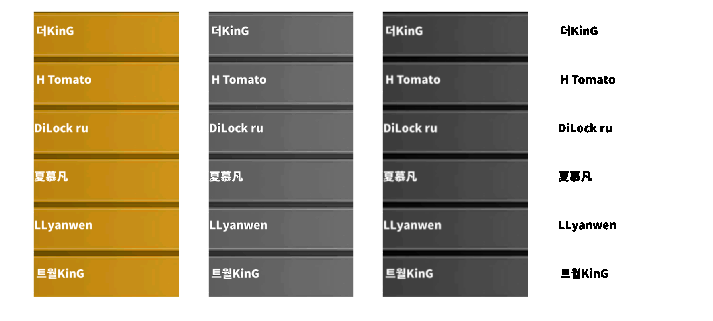

In [53]:
server = '1719'

initial = Image.open('./data/' + server + '/original/' + str(1) + '.png')
width = initial.size[0]
height = initial.size[1]

croped = initial.crop((width*0.261, height*0.26, width*0.45, height*0.92))
croped.save('./data/' + server + '/name/' + str(1) + '.png')

img_ori = cv2.imread('data/' + server + '/name/' + str(1) + '.png')

gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

ret, img_thresh = cv2.threshold(
    img_blurred, 
    160,
    255,
    cv2.THRESH_BINARY_INV
)

plt.figure(figsize=(12, 10))
plt.subplot(141)
plt.imshow(img_ori, cmap='gray')

plt.subplot(142)
plt.imshow(gray, cmap='gray')

plt.subplot(143)
plt.imshow(img_blurred, cmap='gray')

plt.subplot(144)
plt.imshow(img_thresh, cmap='gray')

chars = pytesseract.image_to_string(img_thresh, lang='kor+chi_sim+eng+')
print(chars)